<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP6/TP6_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

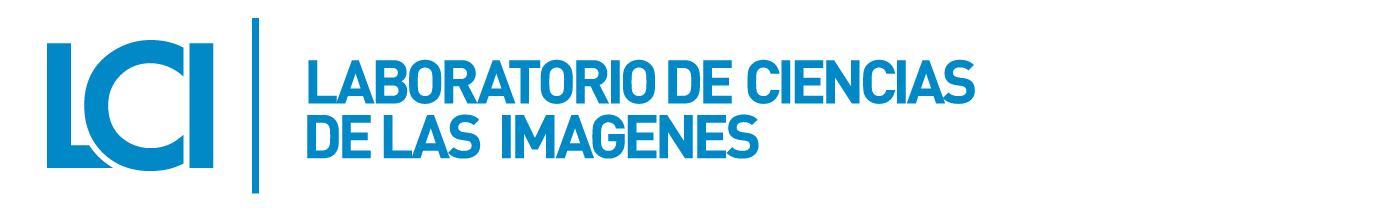


#Práctica 6: Gramáticas L

##Presentado por: Ronny Guevara

### Objetivo General
Desarrollar un aplicativo que permita renderizar estructuras mediante gramáticas L
### Objetivos Específicos
*   Implementar procedimientos paralelos de reescritura para generar fractales.
*   Visualizar los resultados

###Problema
Implementar procedimientos paralelos de reescritura que permita renderizar estructuras fractales. Permitir al usuario interactuar con el aplicativo.

###Desarrollo
El desarrollo se divide en 2 etapas, la primera tiene como objetivo la creación de funciones para el renderizado, lectura de gramáticas y condiciones. En la segunda etapa se agregan las reglas y widgets para interacción.

In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib import collections
import warnings
warnings.filterwarnings('ignore')

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)
        self.rule = rule
        self.info = info
 
    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * pi / 180
                t = p[0] + l*cos(r), p[1] + l*sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines
 
 
def draw(ax, rule, iter=None):
    if iter!=None:
        rule["iter"] = iter
    lines = L_System(rule).get_lines()
    linecollections = collections.LineCollection(lines)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal")
    ax.set_axis_off()
    ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
    ax.invert_yaxis()

In [2]:
def draw_L(num):
  fig = plt.figure(figsize=(12,7))
  plt.title(Option, fontsize = 15)
  ax = fig.add_subplot(111)
  draw(ax, rules[num])
  plt.show()

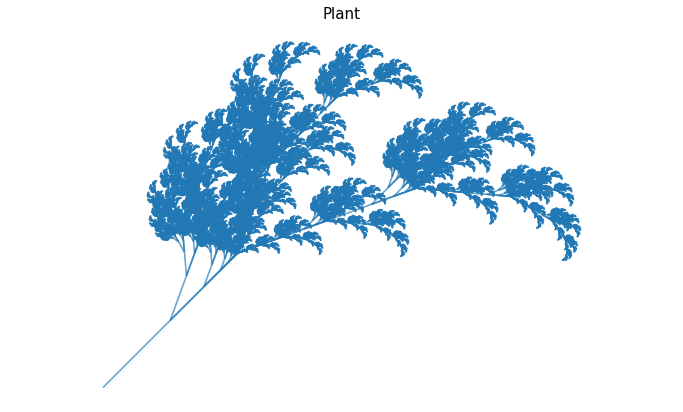

In [3]:
from google.colab import widgets
#@title Seleccione la gráfica { run: "auto" }
Option = 'Plant' #@param ["Koch","Dragon","Triangle","Plant","Hilbert","Sierpinski"]
iterations = 10 #@param {type:"slider", min:1, max:12, step:1}
rules = [
    {
        "F":"F-F++F-F", "S":"F",
        "direct":180,
        "angle":60,
        "iter":iterations,
        "title":"Koch"
    },
    {
        "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
        "direct":0,
        "angle":90,
        "iter":iterations,
        "title":"Dragon"
    },
    {
        "f":"F-f-F", "F":"f+F+f", "S":"f",
        "direct":0,
        "angle":60,
        "iter":iterations,
        "title":"Triangle"
    },
    {
        "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
        "direct":-45,
        "angle":25,
        "iter":iterations,
        "title":"Plant"
    },
    {
        "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
        "direct":0,
        "angle":90,
        "iter":iterations,
        "title":"Hilbert"
    },
    {
        "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
        "direct":0,
        "angle":45,
        "iter":iterations,
        "title":"Sierpinski"
    },
]
if Option == 'Koch':
  draw_L(0)
if Option == 'Dragon':
  draw_L(1)
if Option == 'Triangle':
  draw_L(2)
if Option == 'Plant':
  draw_L(3)
if Option == 'Hilbert':
  draw_L(4)
if Option == 'Sierpinski':
  draw_L(5)

###Análisis de resultados

*   El aplicativo desarrollado satisface con los objetivos del trabajo práctico, el mismo permite el renderizado de algunos fractales clásicos como la curva de Von Koch, el triángulo de Sierpinski, modelado del crecimiento vegetal, etc, aplicando Gramáticas L.

*   El usuario puede interactuar con el aplicativo mediante scrollbars, donde se permite seleccionar el fractal a graficar y el número de interacciones en el renderizado.


##Spyder
A continuación, se encuentra el Código a ejecutar en Spyder versión 5.3.0, se implementa un panel principal que permite al usuario ingresar el número de iteraciones y seleccionar el fractal a renderizar. El zoom al fractal podrá realizarse con la herramienta predeterminada del sistema.

In [ ]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib import collections
from tkinter import *
import warnings
warnings.filterwarnings('ignore')

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)
        self.rule = rule
        self.info = info
 
    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * pi / 180
                t = p[0] + l*cos(r), p[1] + l*sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines
 
 
def draw(ax, rule, iter=None):
    if iter!=None:
        rule["iter"] = iter
    lines = L_System(rule).get_lines()
    linecollections = collections.LineCollection(lines)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal")
    ax.set_axis_off()
    ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
    ax.invert_yaxis()

def draw_L(num):
    
  selection = combo.get()
  value=my_entry.get()
  value = int(value)
  rules = [
      {
          "F":"F-F++F-F", "S":"F",
          "direct":180,
          "angle":60,
          "iter":value,
          "title":"Koch"
      },
      {
          "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
          "direct":0,
          "angle":90,
          "iter":value,
          "title":"Dragon"
      },
      {
          "f":"F-f-F", "F":"f+F+f", "S":"f",
          "direct":0,
          "angle":60,
          "iter":value,
          "title":"Triangle"
      },
      {
          "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
          "direct":-45,
          "angle":25,
          "iter":value,
          "title":"Plant"
      },
      {
          "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
          "direct":0,
          "angle":90,
          "iter":value,
          "title":"Hilbert"
      },
      {
          "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
          "direct":0,
          "angle":45,
          "iter":value,
          "title":"Sierpinski"
      },
  ]
  fig = plt.figure(figsize=(10,7))
  plt.title(selection, fontsize = 15)
  ax = fig.add_subplot(111)
  draw(ax, rules[num])
  plt.show()


def retrieve():
    selection = combo.get()
    
    if selection == "Koch":
      draw_L(0)
    if selection == "Dragon":
      draw_L(1)
    if selection == "Triangle":
      draw_L(2)
    if selection == "Plant":
      draw_L(3)
    if selection == "Hilbert":
      draw_L(4)
    if selection == "Sierpinski":
      draw_L(5)
    return()
 
def salir():
    ventana.destroy()

ventana = Tk()
ventana.geometry("350x180")
ventana.title("Panel Principal")
frame = Frame(ventana)
frame.pack()

el = Label(frame, text = "Numero de iteracciones, máx=15",
           bg = "blue", fg = "white")
el.pack()

my_entry = Entry(frame, width = 20)
my_entry.insert(0,0)
my_entry.pack(padx = 5, pady = 5)

la = Label(frame, text = "Seleccione el fractal",
           bg = "blue", fg = "white")
la.pack()

my_entry2 = Entry(frame, width = 15)
my_entry2.insert(0,0)
my_entry2.pack(padx = 5, pady = 5)

combo = ttk.Combobox(
    state="readonly",
    values=["Koch","Dragon","Triangle","Plant","Hilbert","Sierpinski"]
)
combo.place(x=100, y=76)

ver = Button(frame, text = "Submit", command = retrieve)
ver.pack()

salir = Button(frame, text = "Salir", command = salir)
salir.pack()

ventana.mainloop()